#1.ANN Implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

#a)Load and preprocess the MNIST dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#b)Define the architecture

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model

<Sequential name=sequential, built=True>

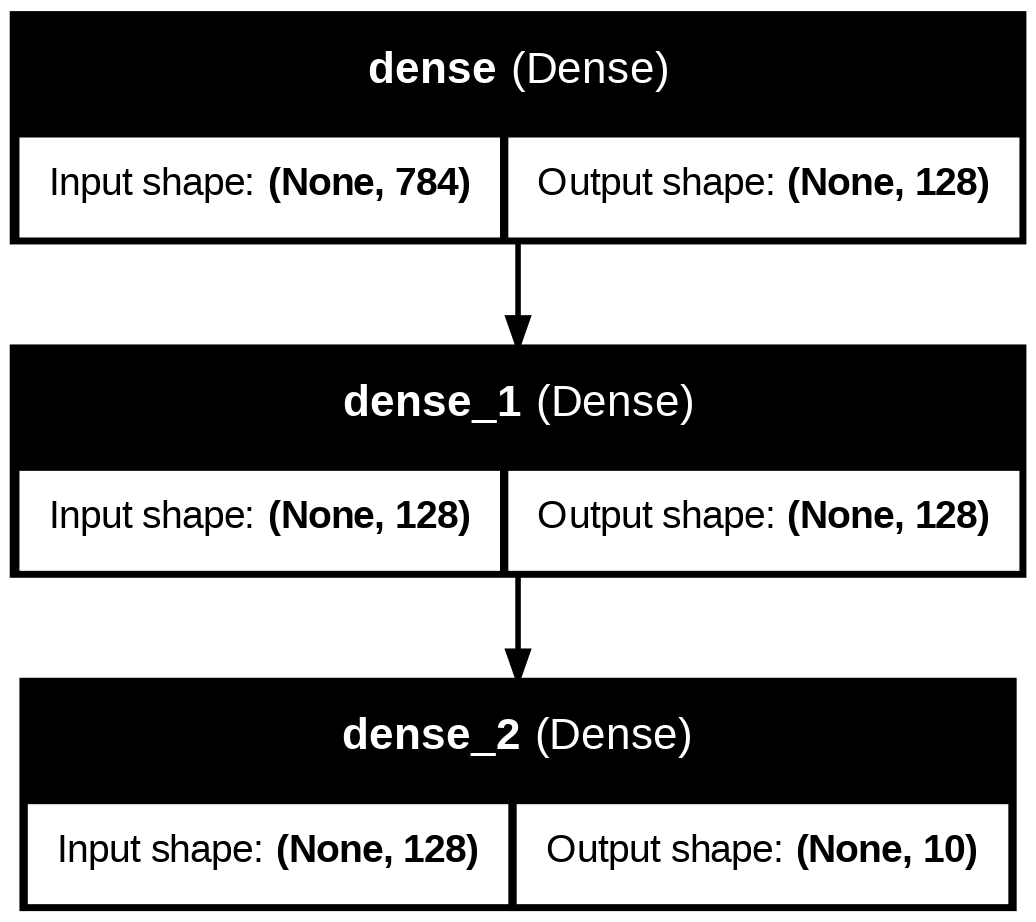

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True,)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

#c)Compile The Model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# 1
import os
import datetime
#2
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)

logs/20241018-114028


#d)Train The Model

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8841 - loss: 0.3940 - val_accuracy: 0.9638 - val_loss: 0.1203
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9708 - loss: 0.0974 - val_accuracy: 0.9711 - val_loss: 0.0932
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9792 - loss: 0.0664 - val_accuracy: 0.9710 - val_loss: 0.0869
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9852 - loss: 0.0489 - val_accuracy: 0.9731 - val_loss: 0.0831
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9872 - loss: 0.0403 - val_accuracy: 0.9782 - val_loss: 0.0783
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9902 - loss: 0.0298 - val_accuracy: 0.9754 - val_loss: 0.0899
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 0.9782 - val_loss: 0.0892
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9928 - loss: 0.0

#e)Evalute the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9708 - loss: 0.1224
Test accuracy: 0.9764999747276306


#2)CNN IMPLEMENTATION

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#a)Load and preprocess

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


#b)Define the CNN Model:

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#c)Compile The Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#d)Train the model

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 165ms/step - accuracy: 0.3403 - loss: 1.8252 - val_accuracy: 0.5238 - val_loss: 1.3305
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 169ms/step - accuracy: 0.5544 - loss: 1.2623 - val_accuracy: 0.6004 - val_loss: 1.1561
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 164ms/step - accuracy: 0.6174 - loss: 1.0927 - val_accuracy: 0.6433 - val_loss: 1.0362
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 162ms/step - accuracy: 0.6651 - loss: 0.9670 - val_accuracy: 0.6641 - val_loss: 0.9636
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 159ms/step - accuracy: 0.6865 - loss: 0.9136 - val_accuracy: 0.6693 - val_loss: 0.9462
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 160ms/step - accuracy: 0.7054 - loss: 0.8510 - val_accuracy: 0.6818 - val_loss: 0.9194
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 62s 157ms/step - accuracy: 0.7286 - loss: 0.7938 - val_accuracy: 0.6951 - val_loss: 0.8855
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 64s 163ms/step - accuracy: 0.7424 - loss: 0

#e)Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7115 - loss: 0.8450
Test accuracy: 0.7113999724388123


#f)Visualization

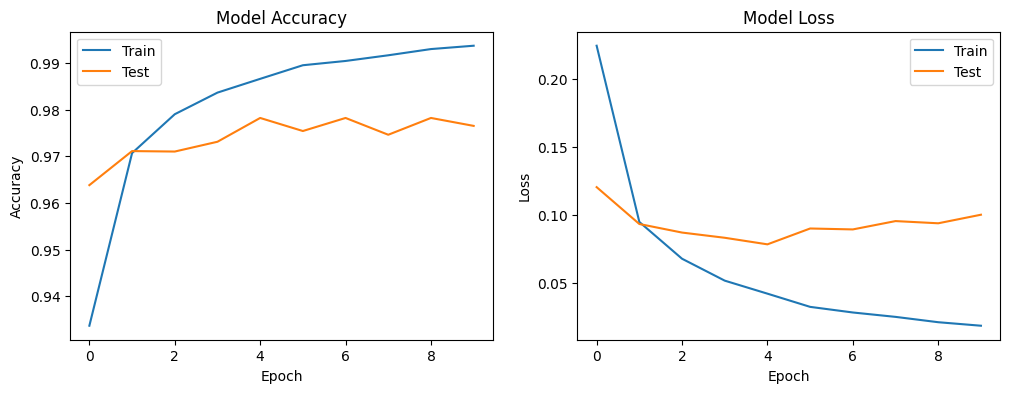

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])


plt.show()